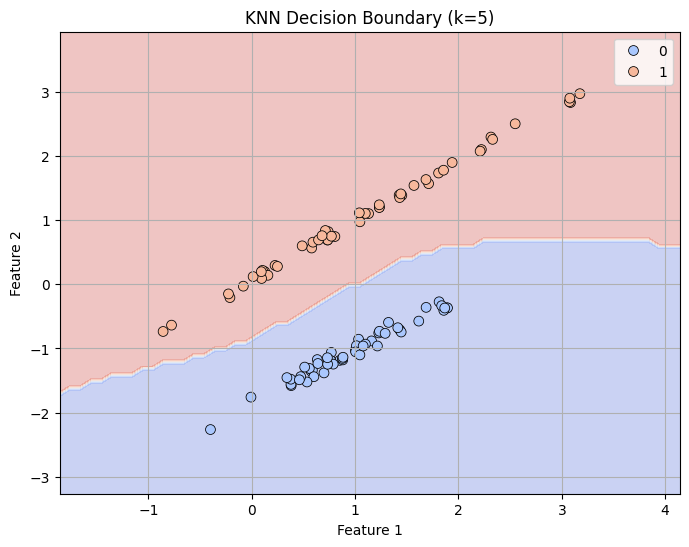

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from knn import KNNClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# plt.figure(figsize=(7, 5))
# sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", s=50)
# plt.title("Synthetic 2D Classification Data")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.grid(True)
# plt.show()

model = KNNClassifier(k=5)
model.fit(X, y)

# Create meshgrid for decision boundary
h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points).reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.3)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", s=50, edgecolor='k')
plt.title(f"KNN Decision Boundary (k={model.k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()